In [57]:
import pandas as pd

file_path = '../data/Compensation_pre.csv'
data = pd.read_csv(file_path, index_col =0)
data

,지역,학교급,사고자구분,사고자학년,사고자성별,사고시간,사고장소,사고부위,사고형태,사고당시활동,학교급_사고자학년,보상급여
0,전남,고등학교,일반학생,2학년,남,쉬는시간,강당(체육관),골반/엉덩이,그밖의 손상 사고,기타,고등학교 2학년,31900
1,대구,초등학교,일반학생,6학년,여,체육,운동장,두피,그밖의 손상 사고,기타 스포츠 활동,초등학교 6학년,53000
2,경남,고등학교,일반학생,1학년,남,그 밖의 교육활동 시간,기타 교외,기타,그밖의 손상 사고,기타,고등학교 1학년,15027050
3,전북,초등학교,일반학생,5학년,남,쉬는시간,일반(교과)교실,어깨,그밖의 손상 사고,기타,초등학교 5학년,3114900
4,제주,초등학교,일반학생,2학년,남,식사시간(간식 포함),기타 교외,치아,고정된 물체와의 부딪힘,기타,초등학교 2학년,1106500
...,...,...,...,...,...,...,...,...,...,...,...,...
425209,서울,중학교,일반학생,3학년,여,체육,강당(체육관),손가락,고정된 물체와의 부딪힘,피구,중학교 3학년,97200
425210,서울,초등학교,일반학생,5학년,남,체육,강당(체육관),복합부위,사람과의 부딪힘,기타 구기,초등학교 5학년,585950
425211,서울,기타학교,일반학생,3학년,여,현장학습,기타 교외,무릎,넘어짐,"걷기/뛰기, 오르내리기",기타학교 3학년,0
425212,서울,기타학교,일반학생,2학년,여,쉬는시간,계단,어깨,넘어짐,"걷기/뛰기, 오르내리기",기타학교 2학년,284910


In [58]:
import numpy as np

# 1) target 생성
data['target'] = data['학교급'].map(
    lambda x: 0 if x in ['초등학교', '중학교', '고등학교'] else (1 if x in ['특수학교', '유치원'] else np.nan)
)

# 2) 기타학교 제거
data = data.dropna(subset=['target']).copy()
data['target'] = data['target'].astype(int)

print(data['target'].value_counts())

target
0    387972
1     34812
Name: count, dtype: int64


In [59]:
# 3) 로그 변환
data['log_보상급여'] = np.log1p(data['보상급여'])

# 확인
print(data[['보상급여', 'log_보상급여']].describe())

               보상급여       log_보상급여
count  4.227840e+05  422784.000000
mean   4.676172e+05      11.797236
std    5.820941e+06       1.328026
min    0.000000e+00       0.000000
25%    5.840000e+04      10.975088
50%    1.144850e+05      11.648208
75%    2.778000e+05      12.534660
max    1.010000e+09      20.733216


In [60]:
# 각 변수별 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422784 entries, 0 to 425213
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   지역         422784 non-null  object 
 1   학교급        422784 non-null  object 
 2   사고자구분      422784 non-null  object 
 3   사고자학년      422784 non-null  object 
 4   사고자성별      422784 non-null  object 
 5   사고시간       422784 non-null  object 
 6   사고장소       422784 non-null  object 
 7   사고부위       422784 non-null  object 
 8   사고형태       422784 non-null  object 
 9   사고당시활동     422784 non-null  object 
 10  학교급_사고자학년  422784 non-null  object 
 11  보상급여       422784 non-null  int64  
 12  target     422784 non-null  int64  
 13  log_보상급여   422784 non-null  float64
dtypes: float64(1), int64(2), object(11)
memory usage: 48.4+ MB


In [61]:
pre = data[['사고자성별', '사고시간', '사고장소', '사고부위', '사고형태', '사고당시활동', 'log_보상급여', 'target']]

In [62]:
pre

,사고자성별,사고시간,사고장소,사고부위,사고형태,사고당시활동,log_보상급여,target
0,남,쉬는시간,강당(체육관),골반/엉덩이,그밖의 손상 사고,기타,10.370393,0
1,여,체육,운동장,두피,그밖의 손상 사고,기타 스포츠 활동,10.878066,0
2,남,그 밖의 교육활동 시간,기타 교외,기타,그밖의 손상 사고,기타,16.525363,0
3,남,쉬는시간,일반(교과)교실,어깨,그밖의 손상 사고,기타,14.951708,0
4,남,식사시간(간식 포함),기타 교외,치아,고정된 물체와의 부딪힘,기타,13.916713,0
...,...,...,...,...,...,...,...,...
425207,여,체육,특별교실(과학실 외),손가락,움직이는 물체와의 부딪힘,피구,11.342149,0
425208,여,쉬는시간,일반(교과)교실,무릎,넘어짐,휴식,13.876513,1
425209,여,체육,강당(체육관),손가락,고정된 물체와의 부딪힘,피구,11.484536,0
425210,남,체육,강당(체육관),복합부위,사람과의 부딪힘,기타 구기,13.280991,0


In [63]:
from imblearn.over_sampling import SMOTENC
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Label Encoding
cat_cols = ['사고자성별', '사고시간', '사고장소', '사고부위', '사고형태', '사고당시활동']

le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    pre[col] = le.fit_transform(pre[col].astype(str))
    le_dict[col] = le  # 역변환용 저장

# 2️⃣ Feature, Target 구성
X = pre[['사고자성별', '사고시간', '사고장소', '사고부위', '사고형태', '사고당시활동', 'log_보상급여']]
y = pre['target']

# 3️⃣ categorical feature index 설정 (X의 컬럼 순서 기준)
cat_features = [0, 1, 2, 3, 4, 5]  # 앞의 6개 컬럼이 범주형

# 4️⃣ SMOTENC 적용
#smote_nc = SMOTENC(
#    categorical_features=cat_features,
#    sampling_strategy=0.5,
#    random_state=42
#)
# X_resampled, y_resampled = smote_nc.fit_resample(X, y)

X_resampled, y_resampled = X, y

# 5️⃣ 결과 확인
print(y_resampled.value_counts())


target
0    387972
1     34812
Name: count, dtype: int64


In [64]:
for col in cat_cols:
    X_resampled[col] = X_resampled[col].astype('category')

X_resampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 422784 entries, 0 to 425213
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype   
---  ------    --------------   -----   
 0   사고자성별     422784 non-null  category
 1   사고시간      422784 non-null  category
 2   사고장소      422784 non-null  category
 3   사고부위      422784 non-null  category
 4   사고형태      422784 non-null  category
 5   사고당시활동    422784 non-null  category
 6   log_보상급여  422784 non-null  float64 
dtypes: category(6), float64(1)
memory usage: 8.9 MB


In [65]:
from pycaret.classification import *

clf = setup(
    data= X_resampled,
    target = y_resampled,
    session_id = 42,
    fold = 5,
    use_gpu = True,
    categorical_features = ['사고자성별', '사고시간', '사고장소', '사고부위', '사고형태', '사고당시활동'],
    numeric_features = ['log_보상급여'],
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

,Description,Value
0,Session id,42
1,Target,target
2,Target type,Binary
3,Original data shape,"(422784, 8)"
4,Transformed data shape,"(422784, 8)"
5,Transformed train set shape,"(295948, 8)"
6,Transformed test set shape,"(126836, 8)"
7,Numeric features,1
8,Categorical features,6
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA GeForce RTX 4090, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that mee

In [66]:
best_models = compare_models(sort = 'AUC', n_select = 1, fold = 5, cross_validation = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9601,0.9637,0.6433,0.8337,0.7262,0.7051,0.7120,0.4820
lightgbm,Light Gradient Boosting Machine,0.9593,0.9618,0.6218,0.8424,0.7155,0.6941,0.7034,0.9440
catboost,CatBoost Classifier,0.9586,0.9582,0.6019,0.8519,0.7054,0.6838,0.6958,3.4960
gbc,Gradient Boosting Classifier,0.9507,0.9455,0.4880,0.8499,0.6199,0.5957,0.6220,13.3240
rf,Random Forest Classifier,0.9532,0.9422,0.5909,0.7873,0.6751,0.6504,0.6582,1.1800
ada,Ada Boost Classifier,0.9416,0.9336,0.4328,0.7530,0.5496,0.5208,0.5437,3.8200
et,Extra Trees Classifier,0.9474,0.9267,0.5600,0.7380,0.6368,0.6090,0.6158,0.8340
knn,K Neighbors Classifier,0.9424,0.8697,0.5072,0.7102,0.5917,0.5617,0.5709,3.9080
qda,Quadratic Discriminant Analysis,0.9232,0.8030,0.1446,0.6501,0.2365,0.2129,0.2821,0.4060
nb,Naive Bayes,0.9229,0.7976,0.1323,0.6587,0.2204,0.1983,0.2719,0.3080


In [69]:
gbc_model = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9599,0.9650,0.6434,0.8309,0.7253,0.7040,0.7107
1,0.9601,0.9647,0.6490,0.8297,0.7283,0.7071,0.7134
2,0.9599,0.9662,0.6366,0.8377,0.7235,0.7023,0.7100
3,0.9603,0.9616,0.6477,0.8336,0.7290,0.7079,0.7145
4,0.9601,0.9610,0.6399,0.8366,0.7251,0.7040,0.7114
Mean,0.9601,0.9637,0.6433,0.8337,0.7262,0.7051,0.7120
Std,0.0002,0.0020,0.0046,0.0031,0.0021,0.0021,0.0017


In [70]:
tuned_gbcboost = tune_model(
    gbc_model,
    optimize = 'AUC',
    choose_better = True,
    n_iter = 10
)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8718,0.9633,0.9239,0.3842,0.5428,0.4826,0.5457
1,0.8756,0.9639,0.9222,0.3915,0.5496,0.4908,0.5517
2,0.8757,0.9649,0.9179,0.3914,0.5488,0.4899,0.5500
3,0.8709,0.9616,0.9157,0.3815,0.5386,0.4780,0.5402
4,0.8720,0.9593,0.9083,0.3829,0.5387,0.4783,0.5387
Mean,0.8732,0.9626,0.9176,0.3863,0.5437,0.4839,0.5453
Std,0.0020,0.0020,0.0055,0.0043,0.0047,0.0055,0.0052


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [71]:
tuned_gbcboost.feature_importances_

array([0.02006079, 0.33821353, 0.19687186, 0.08314744, 0.06459338,
       0.1359105 , 0.1612025 ], dtype=float32)

In [72]:
tuned_gbcboost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='gpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='binary:logistic', ...)

In [73]:
from pycaret.classification import get_config

X_train = get_config('X_train')
y_train = get_config('y_train')
X_test = get_config('X_test')
y_test = get_config('y_test')

In [17]:
'''
from sklearn.ensemble import GradientBoostingClassifier
# 파라미터 직접 조정(시간 자원 문제)

gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.001, min_samples_leaf=5,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=290, n_iter_no_change=None,
                           random_state=42, subsample=0.25, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

gbc.fit(X_train, y_train)
'''
y_pred_rf = tuned_gbcboost.predict_proba(X_train)[:, 1]

In [75]:
from sklearn.metrics import accuracy_score, roc_auc_score

# AUC (이진분류일 때)
train_auc = roc_auc_score(y_train, tuned_gbcboost.predict_proba(X_train)[:,1])
test_auc = roc_auc_score(y_test, tuned_gbcboost.predict_proba(X_test)[:,1])

print(f"Train AUC: {train_auc:.4f}, Test AUC: {test_auc:.4f}")

Train AUC: 0.9711, Test AUC: 0.9638


In [20]:
from rulefit import RuleFit
gbc = GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.001, min_samples_leaf=5,
                           min_samples_split=10, min_weight_fraction_leaf=0.0,
                           n_estimators=290, n_iter_no_change=None,
                           random_state=42, subsample=0.25, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

rulefit = RuleFit(tree_generator = gbc, rfmode='classification')

In [84]:
# shap
import shap

tree_explainer = shap.TreeExplainer(tuned_gbcboost, X_train)
shap_values = tree_explainer.shap_values(X_train)
feature_names = X_train.columns

100%|===================| 295293/295948 [07:09<00:00]        

In [85]:
## 변수 중요도
for i in range(X.shape[1]):
    feature_imp = np.mean(np.abs(shap_values[:, i]))
    print(f'{feature_names[i]}의 중요도 :', feature_imp)

사고자성별의 중요도 : 0.11016795453434265
사고시간의 중요도 : 0.7651016510552998
사고장소의 중요도 : 0.5804800327113183
사고부위의 중요도 : 0.4379284034551752
사고형태의 중요도 : 0.45911931769157976
사고당시활동의 중요도 : 0.9886795798616805
log_보상급여의 중요도 : 0.3967655421585342


사고당시활동, 사고시간, 사고장소, 사고형태, 사고부위, 보상급여, 성별 순

그 중에도 사고당시활동, 사고시간, 사고장소, 사고형태가 높은 중요도를 보임

높은 중요도를 보이는 4가지 간의 상관을 확인해보자.

In [130]:
def shap_dependence_plot_large(col, shap_values, X_train, le_dict, interaction_col=None, figsize=(15, 10), dot_size = 20):
    import shap
    import matplotlib.pyplot as plt

    # 레이블 역변환용
    x_tick_labels = le_dict[col].classes_ if col in le_dict else None
    color_tick_labels = le_dict[interaction_col].classes_ if interaction_col in le_dict else None

    # subplot으로 직접 Axes 생성해야 figsize 반영됨
    fig, ax = plt.subplots(figsize=figsize)

    shap.dependence_plot(
        ind=col,
        shap_values=shap_values,
        features=X_train,
        interaction_index=interaction_col,
        ax=ax,
        dot_size=dot_size,
        show=False
    )

    # x축 범주형 레이블 설정
    if x_tick_labels is not None:
        ax.set_xticks(range(len(x_tick_labels)))
        ax.set_xticklabels(x_tick_labels, rotation=45, ha='right', fontsize=12, fontweight='bold')

    # 컬러 바도 y축 해석을 위한 tick name 지정
    if color_tick_labels is not None:
        cbar = ax.collections[0].colorbar
        cbar.set_ticks(range(len(color_tick_labels)))
        cbar.set_ticklabels(color_tick_labels)
        cbar.ax.tick_params(labelsize=10)
        for label in cbar.ax.get_yticklabels():
            label.set_fontweight('bold')
            label.set_fontsize(12)

    ax.axhline(y=0, color='green', linestyle='--', linewidth=2.5, alpha=0.8)
    ax.set_title(f"{col}에 대한 SHAP Dependence", fontsize=16)
    ax.set_ylabel(f"SHAP Value for {col}")
    plt.tight_layout()
    plt.show()

# 해석방법

- **Y축의 위치**
  - 해당 변수의 영향력을 나타내는 것
  - 0보다 클수록(위로 갈수록) 이 변수값은 유치원/특수학교로 예측되게 만드는 변수
  - 0보다 작을수록(아래로 갈수록) 이변수는 초중고로 예측하게 만드는 변수
  - 정리: **위로 갈수록 유치원/특수, 아래로 갈수록 초중고**


- **색깔**
  - 다른 변수 하나와의 연관성
  - 빨간색부터 파란색까지 쭉 나열된 것
  - 예를들어 사고장소와 상관을 본다면?
    - **빨간색: 해당 사고당시활동은 사고장소가 빨간색일 때 자주 발생**
    - **파란색: 해당 사고당시활동은 사고장소가 파란색일 때 자주 발생**

## 1. 사고당시활동과 사고시간

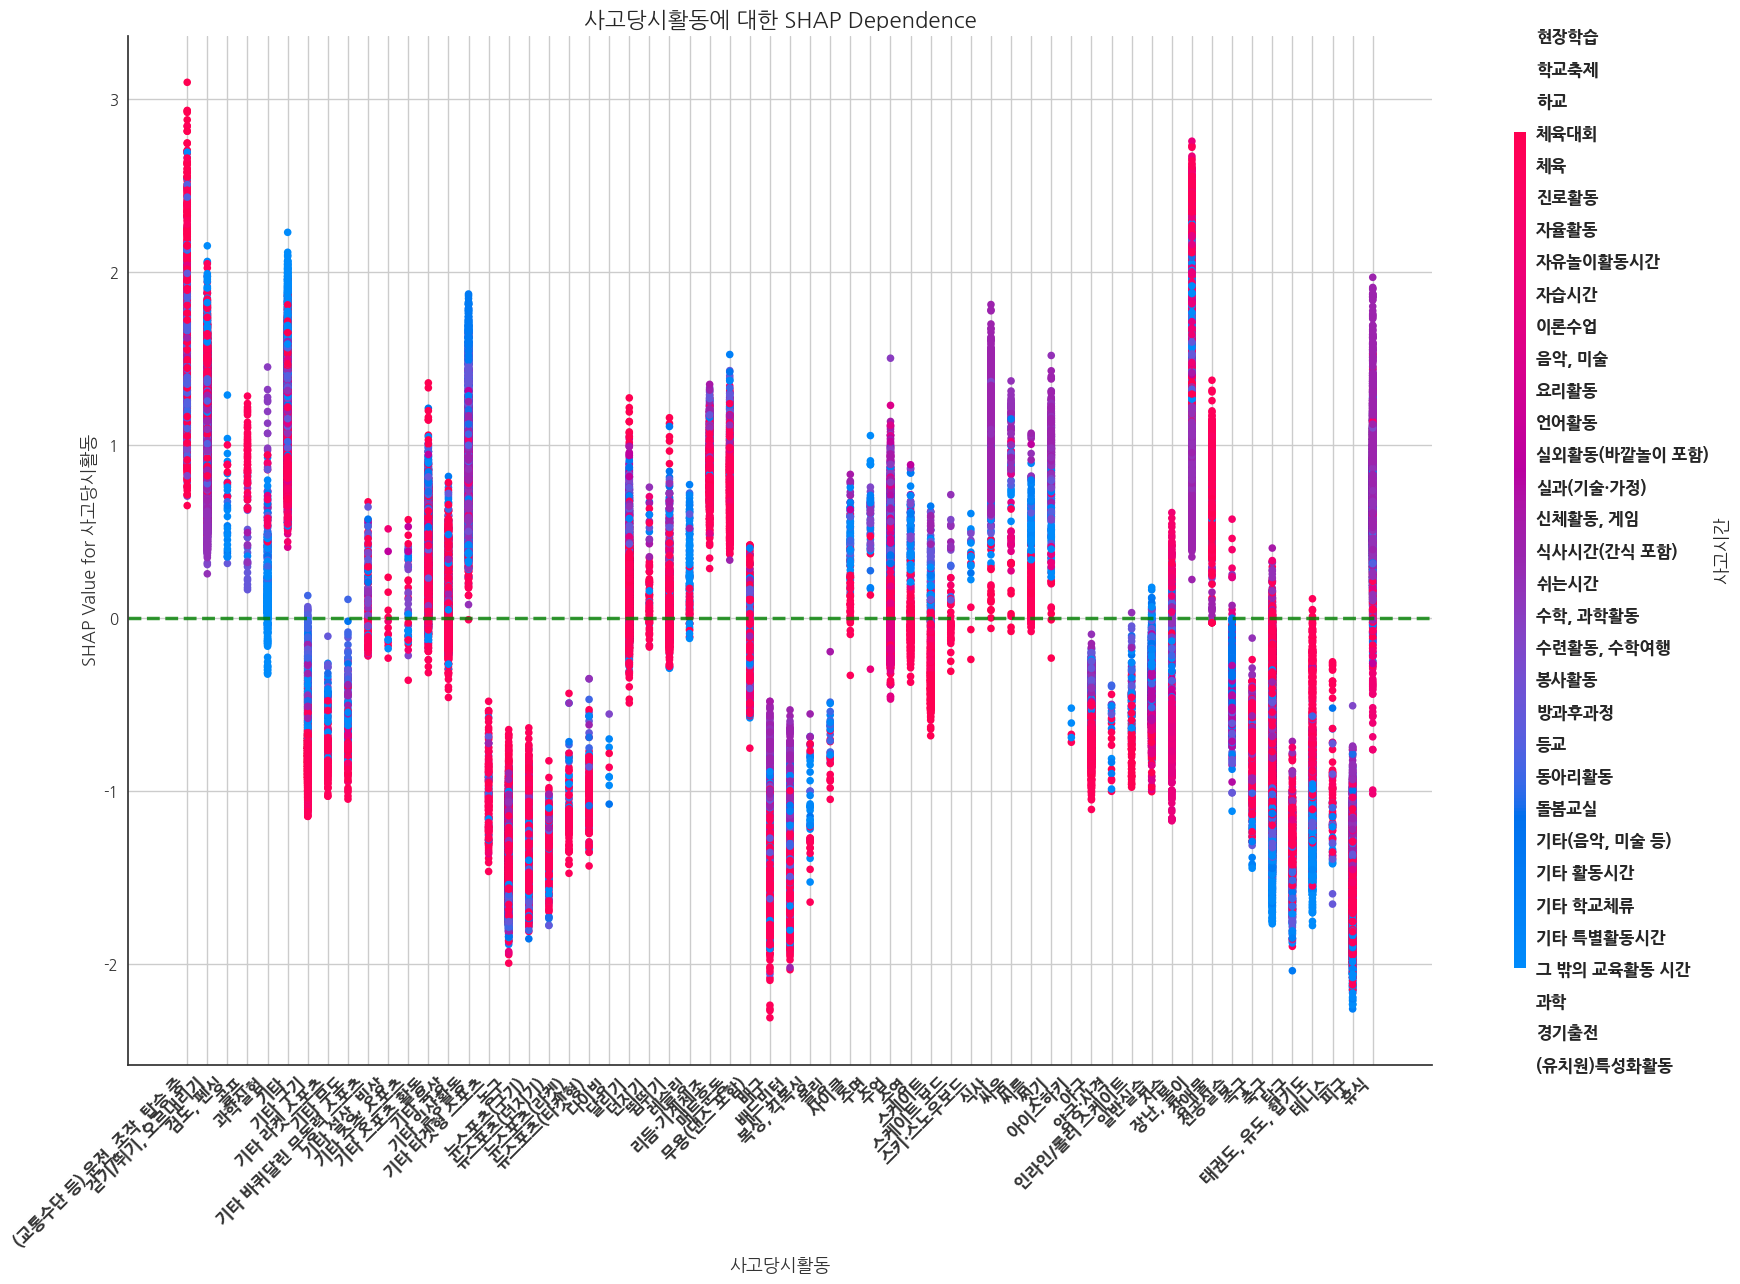

In [131]:
shap_dependence_plot_large(
    col='사고당시활동',
    shap_values=shap_values,
    X_train=X_train,
    le_dict=le_dict,
    interaction_col='사고시간',
    figsize=(18, 13),
    dot_size = 30
)


### 사고당시활동과 사고시간 해석

- 값이 높은 유치원/특수학교를 보면(0값 기준)
  - 운전, 조작, 탑승과 같은 활동을 하는 현장학습, 하교 등의 상황에서 사고 발생
  - 장난, 놀이와 같은 활동을 하는 현장학습, 축제, 체육 활동 등의 상황에서 사고 발생
  - 걷기, 뛰기, 오르내리기의 경우 사고시간과 관계없이 유아/특수학교에서 자주 발생
  - 외에도 대부분의 활동에서 유아/특수학교에서 발생했다고 판단하기 더 쉬움.

- 값이 낮은 초중고를 보면
  - 농구, 뉴스포츠, 배구, 배드민턴, 치구, 테니스 등 대부분의 스포츠 활동에서 초중고가 사고 발생이 높음
  - 활동 시간도 경기출전이나 체육대회, 자율활동 등 여러 시간대에서 골고루 발생함

## 2. 사고당시활동과 사고장소

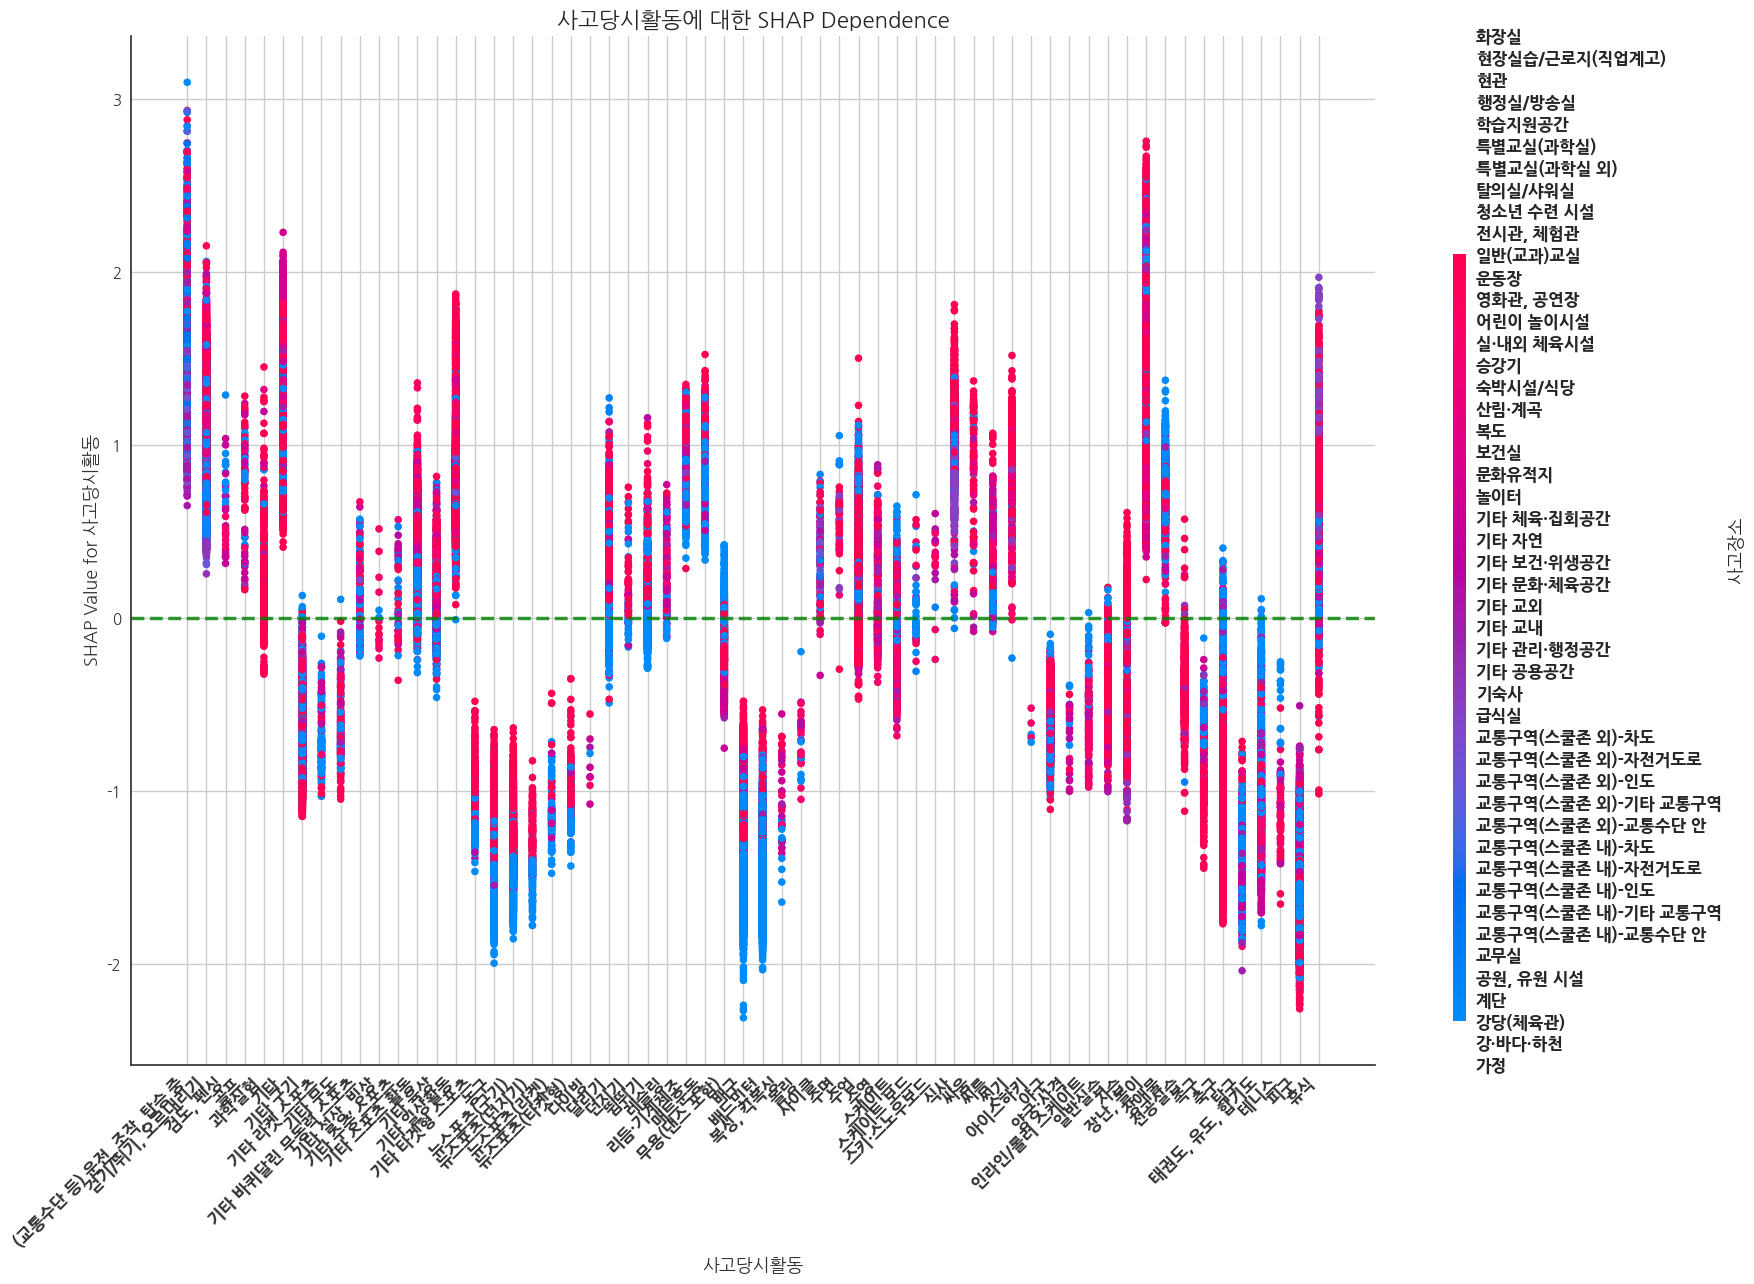

In [132]:
shap_dependence_plot_large(
    col='사고당시활동',
    shap_values=shap_values,
    X_train=X_train,
    le_dict=le_dict,
    interaction_col='사고장소',
    figsize=(18, 13),
    dot_size = 30
)


### 사고당시활동과 사고장소 해석

- 사고당시활동에 대한 분포는 위와 당연히 비슷
- 차이는 사고장소의 색깔
- 각 사고당시활동마다 아래로 갈수록(초중고와 가까워질수록) 파란색이 많아짐
  - 강당, 공원, 계단등의 값에 가까워짐(체육활동을 하는 공간)

- 반면 위로 갈수록 (유치원/특수학교) 빨간색이 많아 지거나 혼합된 형태
  - 학습지원 공간, 특별 교실, 청소년 수련 시설 등 체육과 크게 관련이 없는 곳

## 3. 사고당시활동과 사고형태

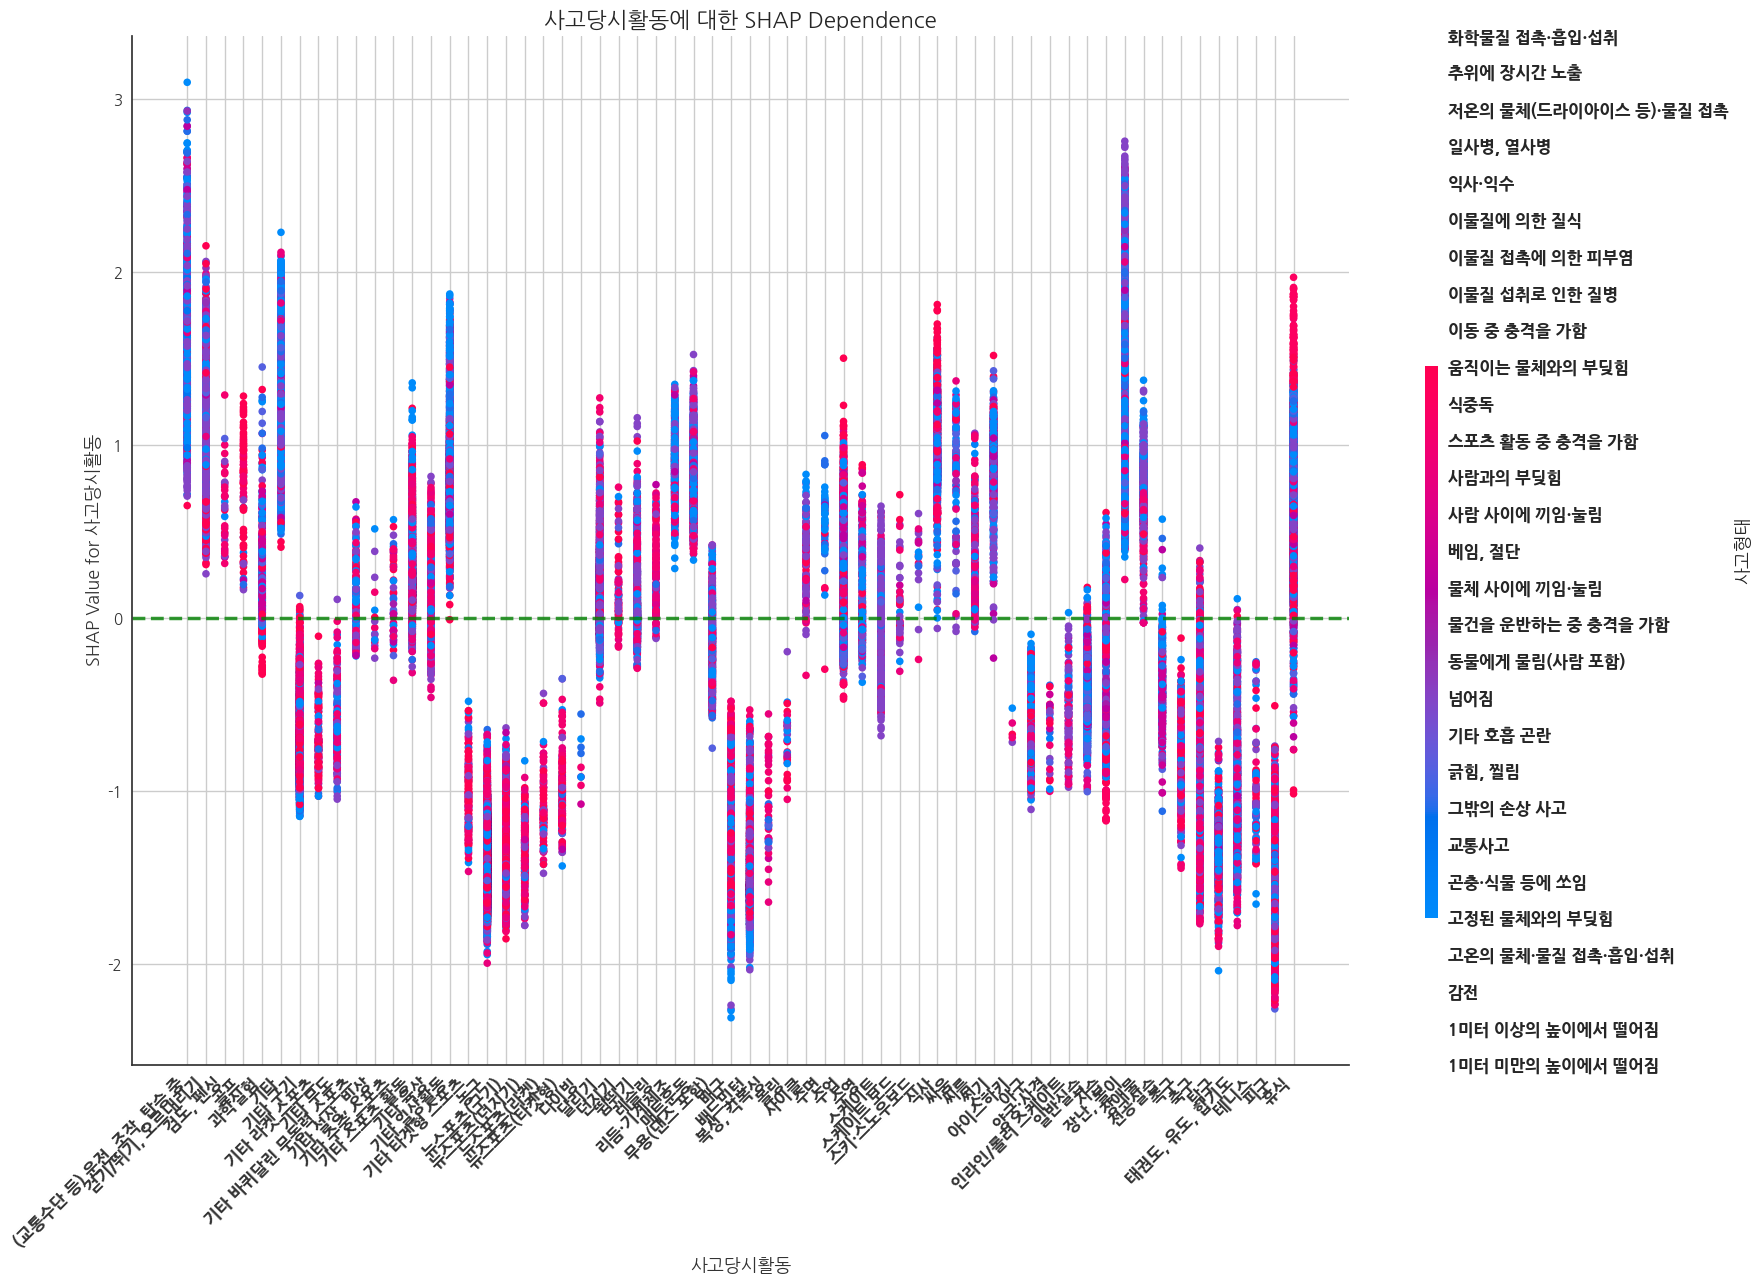

In [133]:
shap_dependence_plot_large(
    col='사고당시활동',
    shap_values=shap_values,
    X_train=X_train,
    le_dict=le_dict,
    interaction_col='사고형태',
    figsize=(18, 13),
    dot_size = 30
)


- 사고당시활동과 사고형태간의 관계는 크게 유관해 보이지는 않는다
  - 점들의 색상이 어느쪽으로 쏠리지 않고 혼합

## 4. 사고시간과 사고장소

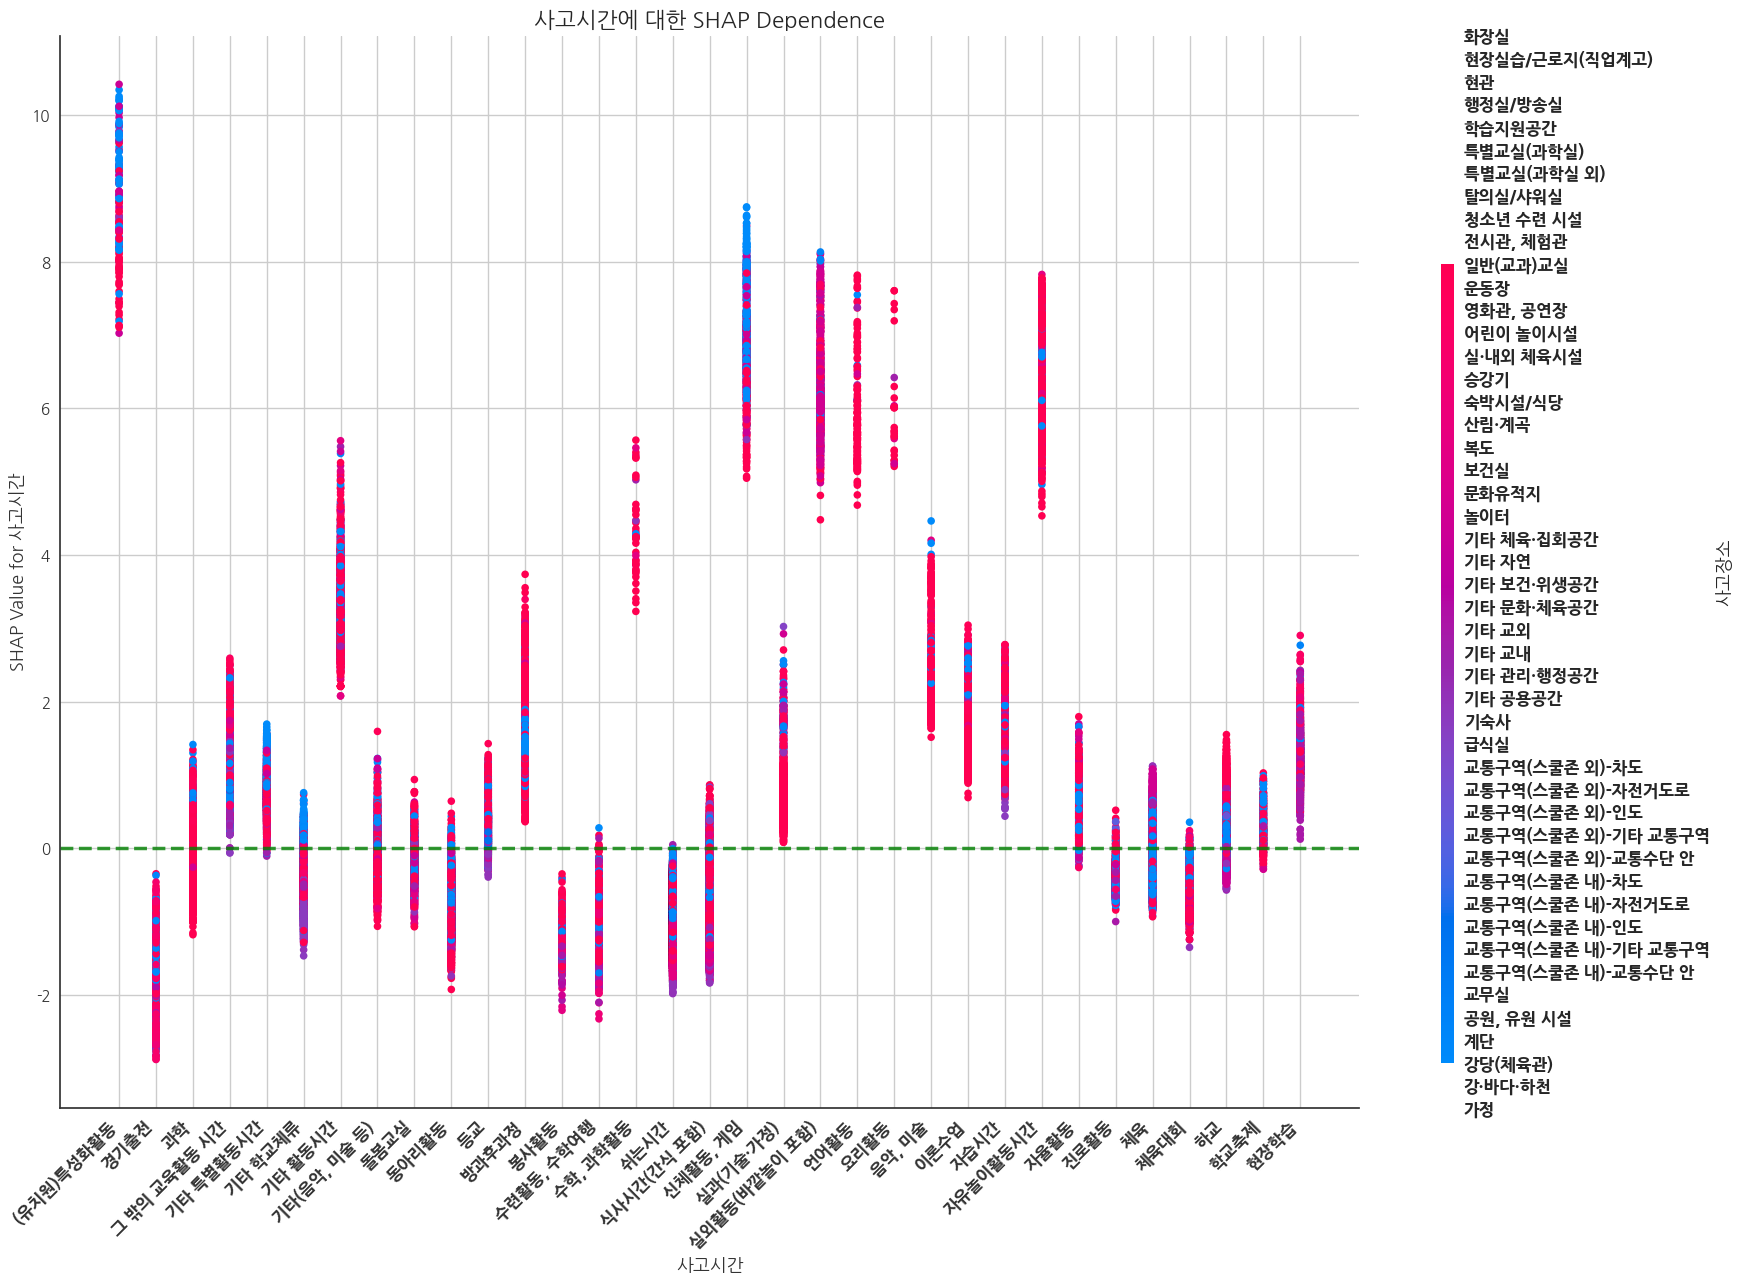

In [134]:
shap_dependence_plot_large(
    col='사고시간',
    shap_values=shap_values,
    X_train=X_train,
    le_dict=le_dict,
    interaction_col='사고장소',
    figsize=(18, 13),
    dot_size = 30
)


### 사고시간과 사고장소 해석

- 대부분이 0 이상으로 초중고에 가가운 것들은 다분포가 아닌 특정 변수들에 몰려있다
- 수련활동, 봉사활동, 경기출전 등으로 유치원/특수학교 학생들이 하기 힘든 활동
- or 식사시간, 쉬는시간등 선생님들이 터치하기 어려운 시간대에 발생

- 유치원/특수학교의 경우 (유치원)특성화활동을 제외하고(유치원/특수학교에서만 하니까) 신체활동, 게임, 자율활동, 실외활동, 언어활동, 요리활동, 기타활동 시간 등 다양하게 분포되어 있다.
- 주목할 점이라면 교육활동시간, 돌봄교실, 언어활동, 음악미술, 이론수업 등 정적인 시간보다는 위에서 말한 동적인 시간대에 더 유아/특수학교라고 판단할 가능성이 높다

## 5. 사고시간과 사고형태

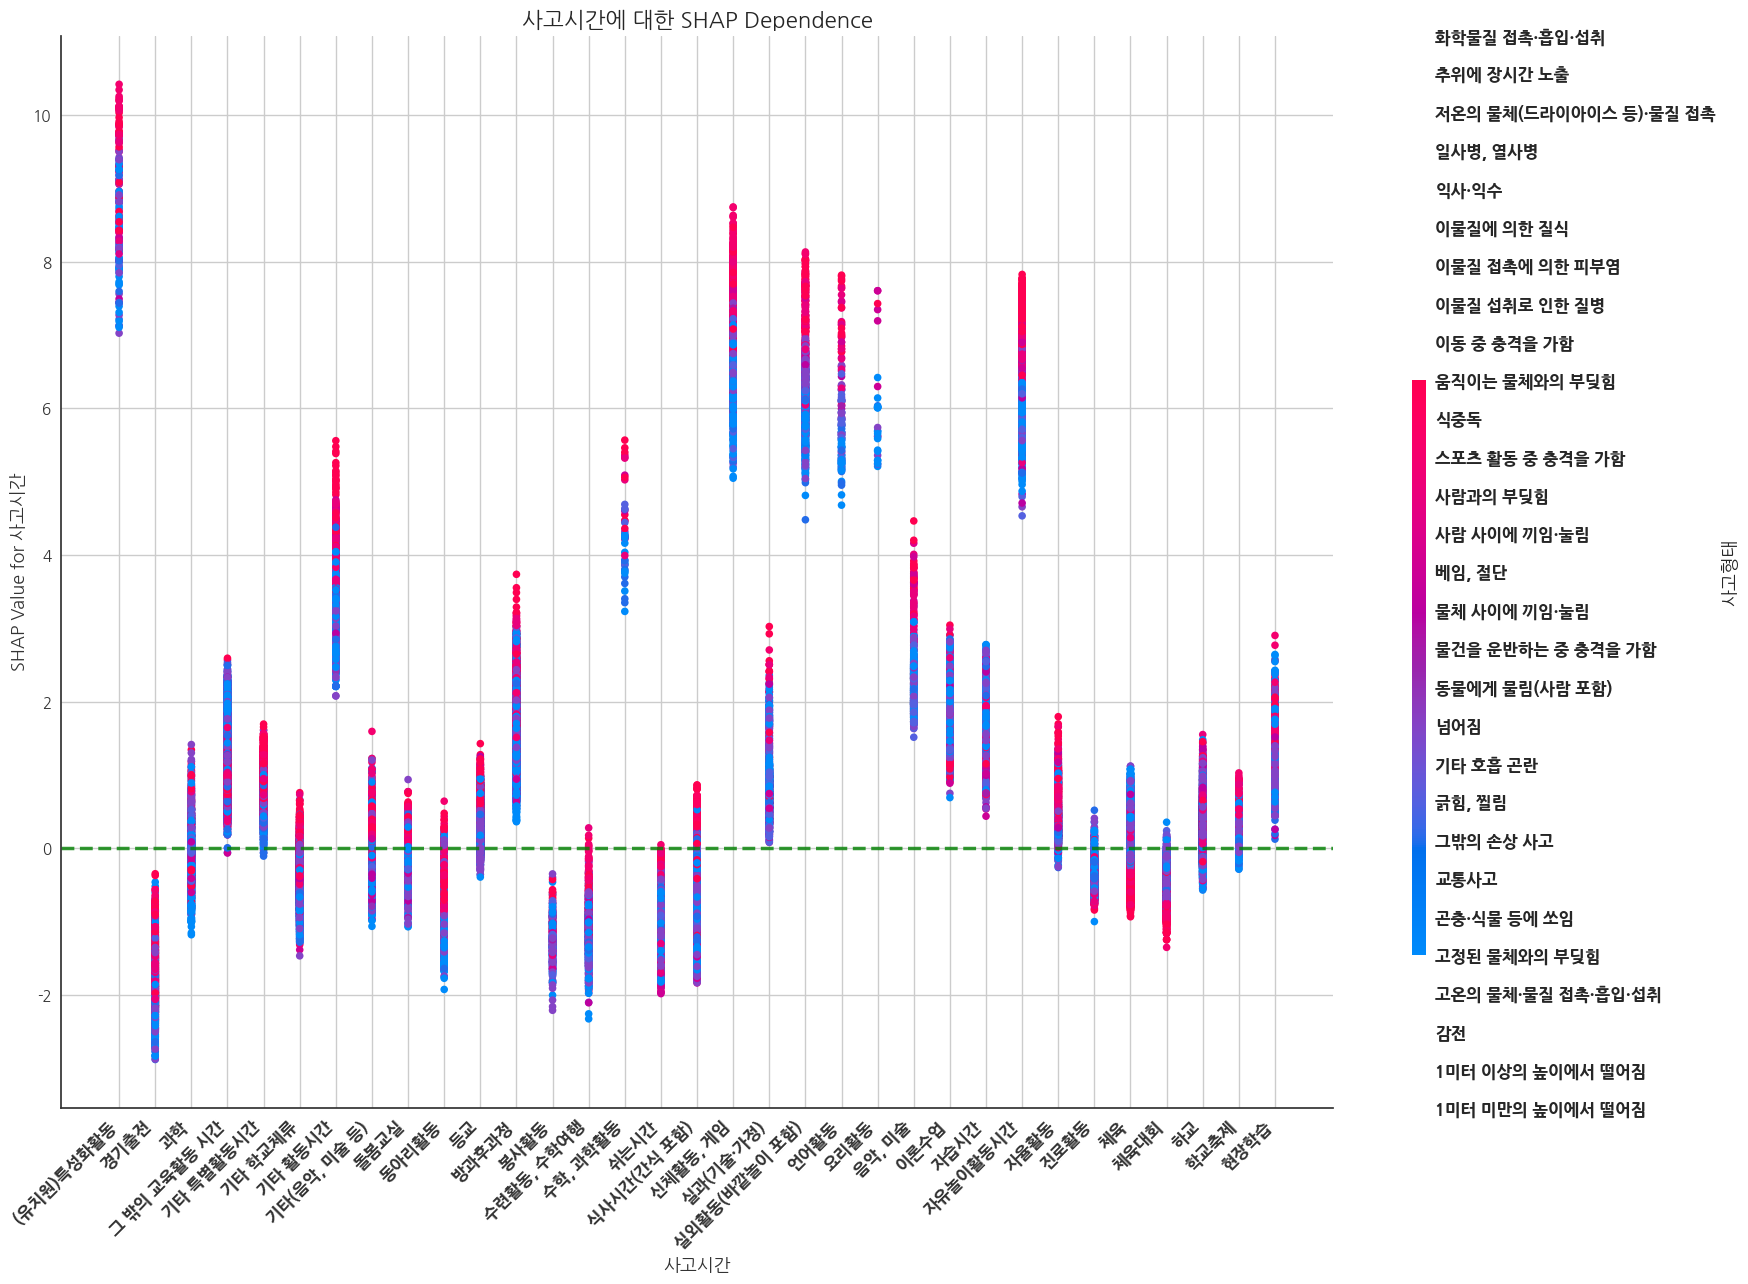

In [135]:
shap_dependence_plot_large(
    col='사고시간',
    shap_values=shap_values,
    X_train=X_train,
    le_dict=le_dict,
    interaction_col='사고형태',
    figsize=(18, 13),
    dot_size = 30
)


### 사고시간과 사고형태 해석

- 사고 형태의 경우 사고당시활동과 다르게 사고시간에서는 약간의 관련이 있는 것으로 보임
- 같은 사고 시간이더라고 유아/특수학교에 가까울 수록 물집 접촉이나 열에의한 사고가 많다
- 반면 초중고에 가까울수록 부딪히거나 떨어지거나 등 활동중에 다치는 사고가 많다

## 6.사고장소와 사고형태

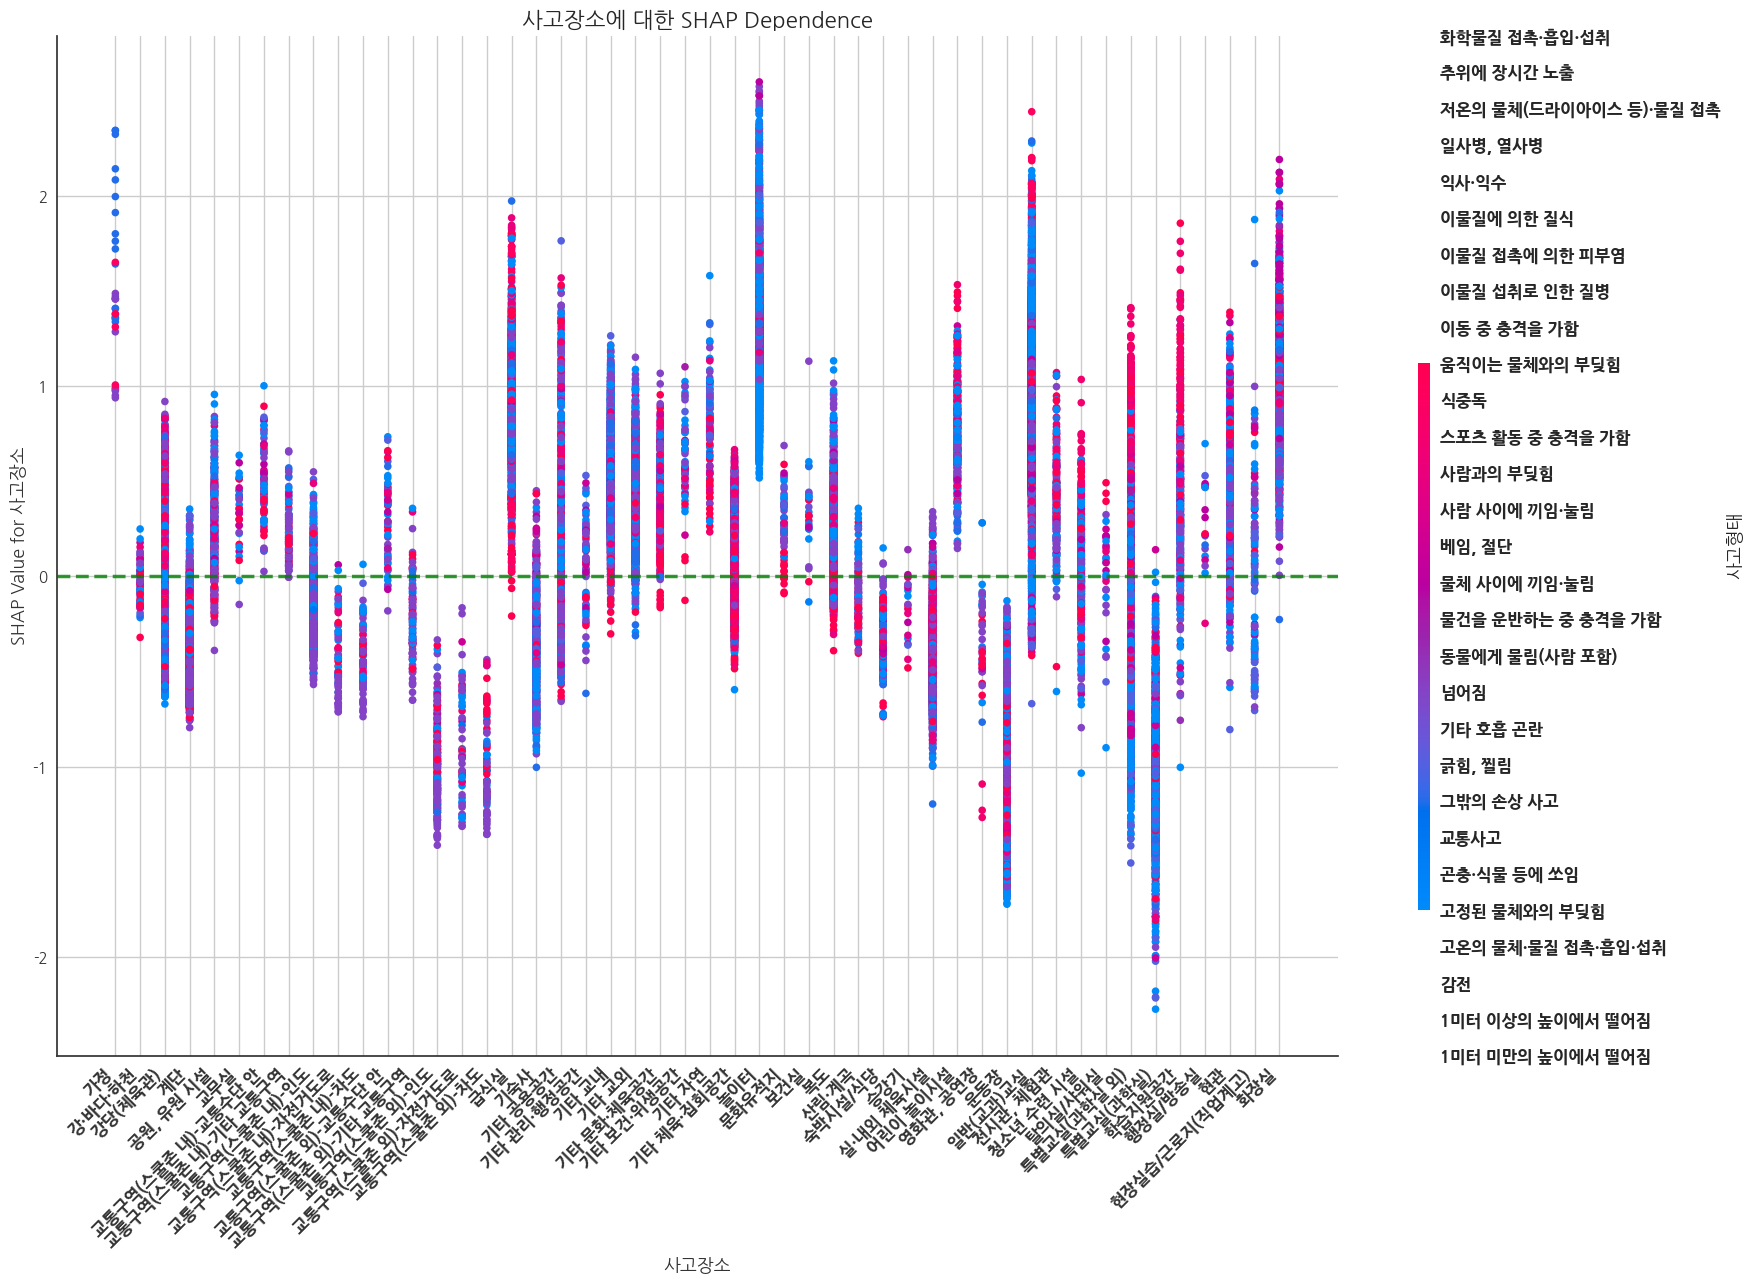

In [136]:
shap_dependence_plot_large(
    col='사고장소',
    shap_values=shap_values,
    X_train=X_train,
    le_dict=le_dict,
    interaction_col='사고형태',
    figsize=(18, 13),
    dot_size = 30
)


### 사고장소와 사고형태 해석

- 장소와 형태간의 연관성은 크게 있어 보이지 않는다

- 차이라면 유아/특수학교는 가정, 놀이터, 급식실, 화장실 등에서 많이 발생

- 초중고는 과학실, 운동장, 교통구역 등에서 많이 발생

크게 유의미한 건 보이지 않음